In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('reduced_well_milled_rice.csv')
df.MONTH = df.MONTH.astype(int)
df["DATE"] = pd.to_datetime(df.YEAR.astype(str) + '/' + df.MONTH.astype(str) + '/01')
df = df.set_index('DATE').asfreq('MS')

In [3]:
df = df.iloc[:, 3:4]

In [4]:
df

,Price / kg
DATE,
1990-01-01,9.50
1990-02-01,9.00
1990-03-01,9.00
1990-04-01,9.65
1990-05-01,9.70
...,...
2020-08-01,46.67
2020-09-01,45.33
2020-10-01,44.92


In [5]:
df.shape

(372, 1)

<Axes: xlabel='DATE'>

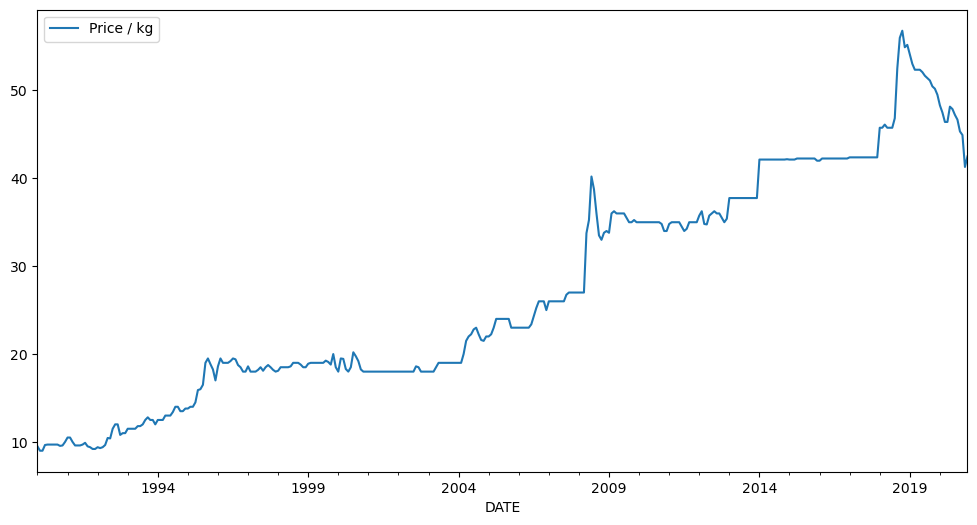

In [6]:
df.plot(figsize=(12,6))

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

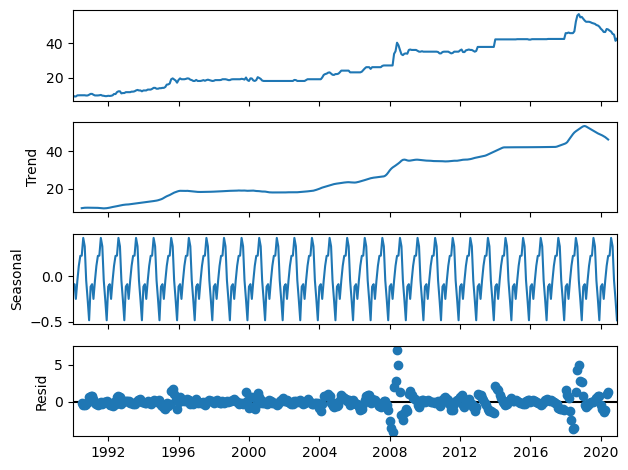

In [8]:
# Run seasonal decomposition again
results = seasonal_decompose(df)
results.plot();

In [9]:
len(df)

372

In [10]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [11]:
print(f"Train Shape: {train.shape} and Test Shape: {test.shape}")

Train Shape: (360, 1) and Test Shape: (12, 1)


In [12]:
test

,Price / kg
DATE,
2020-01-01,48.30
2020-02-01,47.49
2020-03-01,46.41
2020-04-01,46.41
2020-05-01,48.15
2020-06-01,47.88
2020-07-01,47.21
2020-08-01,46.67
2020-09-01,45.33


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
df.head(),df.tail()

(            Price / kg
 DATE                  
 1990-01-01        9.50
 1990-02-01        9.00
 1990-03-01        9.00
 1990-04-01        9.65
 1990-05-01        9.70,
             Price / kg
 DATE                  
 2020-08-01       46.67
 2020-09-01       45.33
 2020-10-01       44.92
 2020-11-01       41.29
 2020-12-01       42.49)

In [15]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [16]:
original_value = scaler.inverse_transform(scaled_train)
original_value

array([[ 9.5 ],
       [ 9.  ],
       [ 9.  ],
       [ 9.65],
       [ 9.7 ],
       [ 9.7 ],
       [ 9.7 ],
       [ 9.7 ],
       [ 9.7 ],
       [ 9.55],
       [ 9.6 ],
       [10.  ],
       [10.5 ],
       [10.5 ],
       [10.  ],
       [ 9.6 ],
       [ 9.6 ],
       [ 9.6 ],
       [ 9.7 ],
       [ 9.9 ],
       [ 9.5 ],
       [ 9.4 ],
       [ 9.2 ],
       [ 9.2 ],
       [ 9.4 ],
       [ 9.3 ],
       [ 9.4 ],
       [ 9.65],
       [10.45],
       [10.4 ],
       [11.5 ],
       [12.  ],
       [12.  ],
       [10.8 ],
       [11.  ],
       [11.  ],
       [11.5 ],
       [11.5 ],
       [11.5 ],
       [11.5 ],
       [11.8 ],
       [11.8 ],
       [12.  ],
       [12.5 ],
       [12.8 ],
       [12.5 ],
       [12.5 ],
       [12.  ],
       [12.5 ],
       [12.5 ],
       [12.5 ],
       [13.  ],
       [13.  ],
       [13.  ],
       [13.4 ],
       [14.  ],
       [14.  ],
       [13.5 ],
       [13.5 ],
       [13.8 ],
       [13.8 ],
       [14.  ],
       [

In [17]:
scaled_train[:80]

array([[0.01046244],
       [0.        ],
       [0.        ],
       [0.01360117],
       [0.01464742],
       [0.01464742],
       [0.01464742],
       [0.01464742],
       [0.01464742],
       [0.01150868],
       [0.01255493],
       [0.02092488],
       [0.03138732],
       [0.03138732],
       [0.02092488],
       [0.01255493],
       [0.01255493],
       [0.01255493],
       [0.01464742],
       [0.01883239],
       [0.01046244],
       [0.00836995],
       [0.00418498],
       [0.00418498],
       [0.00836995],
       [0.00627746],
       [0.00836995],
       [0.01360117],
       [0.03034108],
       [0.02929483],
       [0.0523122 ],
       [0.06277464],
       [0.06277464],
       [0.03766478],
       [0.04184976],
       [0.04184976],
       [0.0523122 ],
       [0.0523122 ],
       [0.0523122 ],
       [0.0523122 ],
       [0.05858966],
       [0.05858966],
       [0.06277464],
       [0.07323708],
       [0.07951454],
       [0.07323708],
       [0.07323708],
       [0.062

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
# define generator 
n_input = 359
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [20]:
# Get the first batch
X, y = generator[0]

# Reshape X to 2D for inverse transformation
# X shape is (1, n_input, n_features)
X_reshaped = X.reshape(-1, 1)  # This will make it (n_input, n_features)

# Inverse transform to get original values
original_values = scaler.inverse_transform(X_reshaped)

# Print results
print(f'Given the Array (scaled): \n{X.flatten()}')
print(f'Original values: \n{original_values.flatten()}')

Given the Array (scaled): 
[0.01046244 0.         0.         0.01360117 0.01464742 0.01464742
 0.01464742 0.01464742 0.01464742 0.01150868 0.01255493 0.02092488
 0.03138732 0.03138732 0.02092488 0.01255493 0.01255493 0.01255493
 0.01464742 0.01883239 0.01046244 0.00836995 0.00418498 0.00418498
 0.00836995 0.00627746 0.00836995 0.01360117 0.03034108 0.02929483
 0.0523122  0.06277464 0.06277464 0.03766478 0.04184976 0.04184976
 0.0523122  0.0523122  0.0523122  0.0523122  0.05858966 0.05858966
 0.06277464 0.07323708 0.07951454 0.07323708 0.07323708 0.06277464
 0.07323708 0.07323708 0.07323708 0.08369952 0.08369952 0.08369952
 0.09206947 0.1046244  0.1046244  0.09416196 0.09416196 0.10043942
 0.10043942 0.1046244  0.1046244  0.11508684 0.14438167 0.14647416
 0.1569366  0.2092488  0.21971124 0.20611006 0.19355514 0.16739904
 0.20087884 0.21971124 0.2092488  0.2092488  0.2092488  0.21343377
 0.21971124 0.21761875 0.20401758 0.19878636 0.18832392 0.18832392
 0.20087884 0.18832392 0.18832392 0

In [21]:
y_reshaped = y.reshape(-1, 1)  # This will make it (n_input, n_features)

# Inverse transform to get original values
original_values = scaler.inverse_transform(y_reshaped)

print(f'Predict this y: \n {y} \n')
print(f'Original values: \n{original_values.flatten()}')

Predict this y: 
 [[0.84766688]] 

Original values: 
[49.51]


In [22]:
X.shape

(1, 359, 1)

In [23]:
# We do the same thing, but now instead for 12 months
#n_input = 12
#generator = TimeseriesGenerator(scaled_train[:, 1:2], scaled_train[:, 1:2], length=n_input, batch_size=1)

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [25]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\Krystel\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6278
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5801
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5331
Epoch 4/50


C:\Users\Krystel\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4875
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4430
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3986
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3558
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3114
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2651
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2193
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1723
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1262
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0810
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0371
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0038
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0209
Epoch 17/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0772
Epoch 18/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0494
Epoch 19/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63

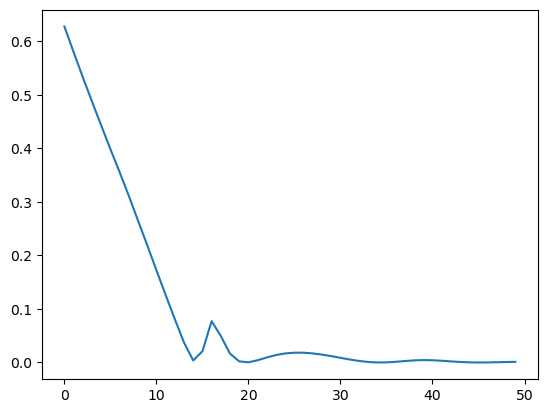

In [28]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [29]:
last_train_batch = scaled_train[-359:]

In [30]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [31]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


array([[0.8083899]], dtype=float32)

In [32]:
scaled_test[0]

array([0.82234777])

In [33]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [34]:
test_predictions

[array([0.8083899], dtype=float32),
 array([0.80178475], dtype=float32),
 array([0.7952793], dtype=float32),
 array([0.78871185], dtype=float32),
 array([0.7820974], dtype=float32),
 array([0.775453], dtype=float32),
 array([0.7687924], dtype=float32),
 array([0.7621273], dtype=float32),
 array([0.75546765], dtype=float32),
 array([0.748822], dtype=float32),
 array([0.74219745], dtype=float32),
 array([0.73560077], dtype=float32)]

In [35]:
test.head()

,Price / kg
DATE,
2020-01-01,48.30
2020-02-01,47.49
2020-03-01,46.41
2020-04-01,46.41
2020-05-01,48.15


In [36]:
true_predictions = scaler.inverse_transform(test_predictions)

In [37]:
test['Predictions'] = true_predictions

C:\Users\Krystel\AppData\Local\Temp\ipykernel_11312\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='DATE'>

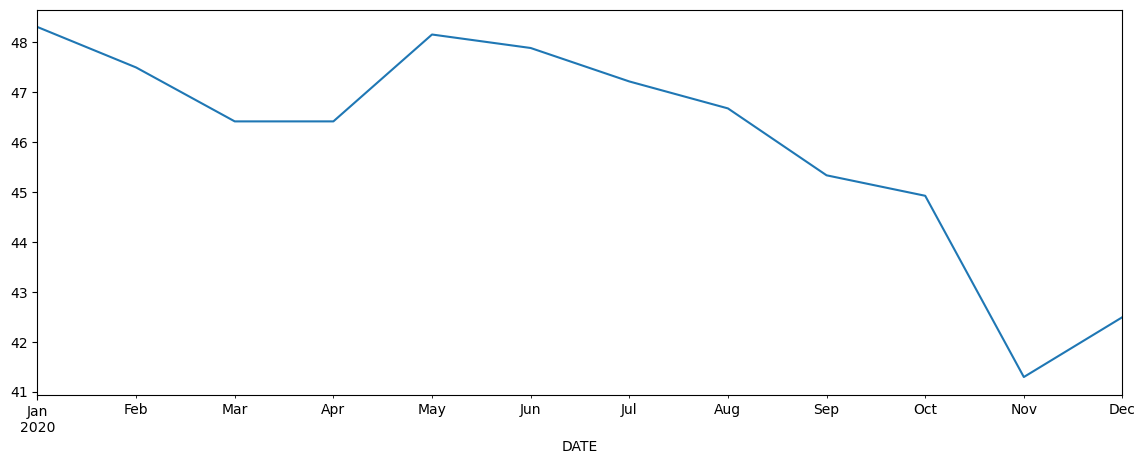

In [38]:
test["Price / kg"].plot(figsize=(14,5))

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(test['Price / kg'], test['Predictions']))
print(f'RMSE: {rmse}')

# Calculate MSE
mse = mean_squared_error(test['Price / kg'], test['Predictions'])
print(f'MSE: {mse}')

# Calculate MAE
mae = mean_absolute_error(test['Price / kg'], test['Predictions'])
print(f'MAE: {mae}')

RMSE: 1.4153294765959463
MSE: 2.0031575273213553
MAE: 1.1028903110325352


In [42]:
# Extend the test dataset to include January 1, 2025
future_dates = pd.date_range(start='2025-01-01', periods=1, freq='MS')
future_predictions = []

# Loop to generate predictions for future dates
for _ in range(len(future_dates)):
    current_pred = model.predict(last_train_batch)[0]
    future_predictions.append(current_pred)
    
    # Update the current batch
    current_batch = np.append(last_train_batch[:, 1:, :], [[current_pred]], axis=1)
    last_train_batch = current_batch

# Inverse transform to get actual predicted prices
actual_future_predictions = scaler.inverse_transform(future_predictions)

# Output the prediction for January 1, 2025
predicted_price_jan_2025 = actual_future_predictions[0][0]
print(f"Predicted Price:\n{predicted_price_jan_2025}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Price:
47.00639889657497
